In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [5]:
def lor_rhs(t, x, sigma, b, r):
    dxdt = np.zeros(3)
    dxdt[0] = sigma * (x[1] - x[0])
    dxdt[1] = x[0] * (r - x[2]) - x[1]
    dxdt[2] = x[0] * x[1] - b * x[2]
    return dxdt

In [74]:
# Parameters
t_span = np.arange(0, 20.001, 0.01)

sigma = 10
b = 8/3
r = 28
x0 = [5, 5, 5]

In [75]:
# Solve ODE
sol = solve_ivp(lor_rhs, [t_span[0], t_span[-1]], x0, t_eval=t_span, args=(sigma, b, r))
xsol = sol.y.T

x_true = xsol[:, 0]
y_true = xsol[:, 1]
z_true = xsol[:, 2]

In [76]:
# Plot initial 3D trajectory (commented out)
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.plot3D(x_true, y_true, z_true, linewidth=2)
#plt.grid(True)
#plt.show()

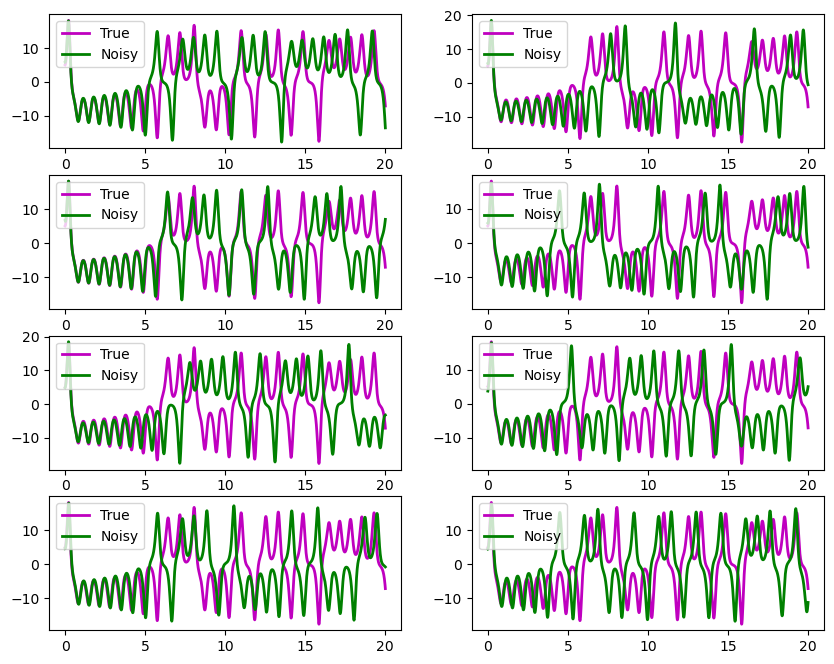

In [77]:
sigma2 = 1  # strength of noise
fig, axs = plt.subplots(4, 2, figsize=(10, 8))

for j in range(8):
    xic = x0 + sigma2 * np.random.randn(3)
    sol = solve_ivp(lor_rhs, [t_span[0], t_span[-1]], xic, t_eval=t_span, args=(sigma, b, r))
    axs[j//2, j%2].plot(t_span, x_true, 'm', label='True', linewidth=2)
    axs[j//2, j%2].plot(t_span, sol.y[0], 'g', label='Noisy', linewidth=2)
    axs[j//2, j%2].legend()

plt.show()

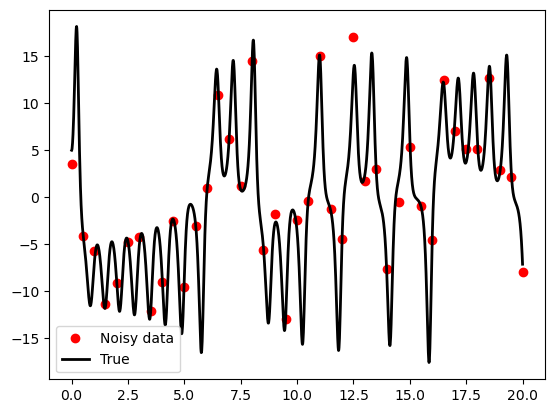

In [78]:
# Noisy observations
tdata = t_span[::50]
n = len(tdata)
xn = np.random.randn(n)
yn = np.random.randn(n)
zn = np.random.randn(n)
sigma3 = 1  # error strength
xdata = x_true[::50] + sigma3 * xn
ydata = y_true[::50] + sigma3 * yn
zdata = z_true[::50] + sigma3 * zn

plt.plot(tdata, xdata, 'ro', label='Noisy data')
plt.plot(t_span, x_true, 'k', label='True', linewidth=2)
plt.legend()
plt.show()

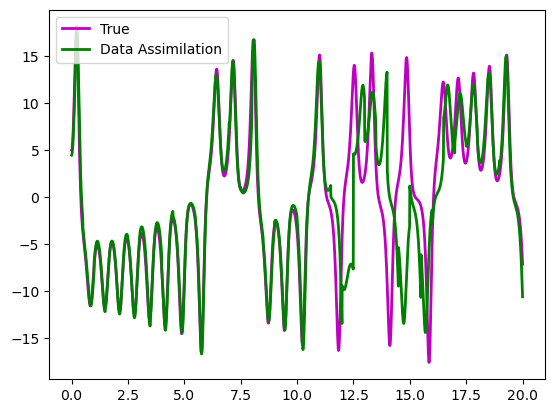

In [79]:
# Data assimilation
x_da = []

for j in range(len(tdata) - 1):
    tspan = np.arange(0, 0.51, 0.01)
    sol = solve_ivp(lor_rhs, [tspan[0], tspan[-1]], xic, t_eval=tspan, args=(sigma, b, r))
    xsol = sol.y.T
    xic0 = xsol[-1, :]
    xdat = np.array([xdata[j+1], ydata[j+1], zdata[j+1]])
    K = sigma2 / (sigma2 + sigma3)
    xic = xic0 + K * (xdat - xic0)
    x_da.extend(xsol[:-1, :])

x_da.append(xsol[-1, :])
x_da = np.array(x_da)

plt.plot(t_span, x_true, 'm', label='True', linewidth=2)
plt.plot(t_span, x_da[:, 0], 'g', label='Data Assimilation', linewidth=2)
plt.legend()
plt.show()